<a href="https://colab.research.google.com/github/som-choudhary/Airbnb/blob/main/Airbnb_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Home-Residential Stays for Business Travelers: A Case Study**

**Scenario**: You work for a European boutique-hotel/home-accommodation company that wants to expand to New York City, your first North American operation. Your company wants to establish a network of home-residences for business travelers who need to be in New York for extended periods for work.

**Ojective**: Your goal is analyze the available NYC open data of accomodation and present the insight of NYC home-accomodation market to help your client make business decisions.











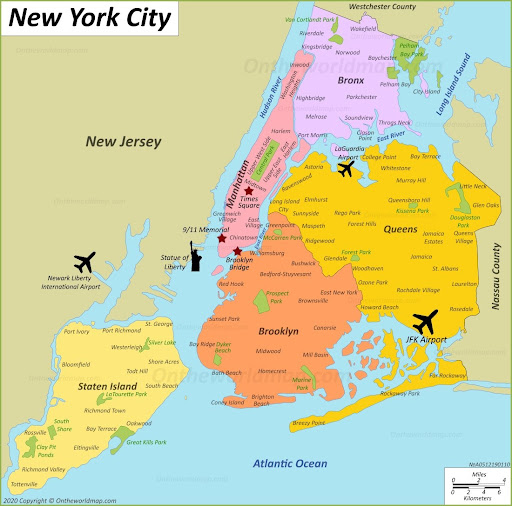

##Project steps:



1.   Data Loading
2.   Data Cleaning
3.   Exploration Data Analysis
4.   Conclusion


# Data Loading

Import necessary packages

In [ ]:
pip install haversine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
from haversine import haversine_vector, Unit


In [ ]:
#read file using Pandas library
df_nyc = pd.read_csv('https://raw.githubusercontent.com/som-choudhary/Airbnb/main/AB_NYC_2019_rev_2_2021(uncleaned).csv')

df_nyc.head()

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,10/19/18,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,NaN,5/21/19,0.38,2.0,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,NaN,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,07-05-2019,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,NaN,-73.94399,Entire home/apt,80.0,10.0,9.0,11/19/18,0.10,1.0,0.0


**Check length and description of data frame**

In [ ]:
#length of dataframe
len(df_nyc)

48895

In [ ]:
#datatype of each column
df_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [ ]:
#statistics summary of the dataframe
df_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48857.000000,48865.000000,48849.000000,48853.000000,48865.000000,38825.000000,48874.000000,48848.000000
mean,1.901714e+07,6.762001e+07,40.728944,-73.952177,152.714385,7.030152,23.263174,1.373284,7.137906,112.741402
std,1.098311e+07,7.861097e+07,0.054533,0.046144,240.222835,20.517685,44.537393,1.680621,32.927030,131.622469
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763100,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#median value of each column
print('Median Values')
print('\n')
print(df_nyc[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].median())

Median Values


price                             106.00
minimum_nights                      3.00
number_of_reviews                   5.00
reviews_per_month                   0.72
calculated_host_listings_count      1.00
availability_365                   45.00
dtype: float64


# Data Cleaning

Let's analyze each column and will do the necessary data cleaning if required

##Missing value handling

In [ ]:
#missing values in each column
df_nyc.isnull().sum()

id                                    0
name                                 17
host_id                               0
host_name                            71
borough                              74
neighbourhood                        45
latitude                             38
longitude                            30
room_type                           104
price                                46
minimum_nights                       42
number_of_reviews                    30
last_review                       10084
reviews_per_month                 10070
calculated_host_listings_count       21
availability_365                     47
dtype: int64

In [ ]:
#percent of missing values
df_nyc.isnull().sum()/len(df_nyc)*100

id                                 0.000000
name                               0.034768
host_id                            0.000000
host_name                          0.145209
borough                            0.151345
neighbourhood                      0.092034
latitude                           0.077718
longitude                          0.061356
room_type                          0.212701
price                              0.094079
minimum_nights                     0.085898
number_of_reviews                  0.061356
last_review                       20.623786
reviews_per_month                 20.595153
calculated_host_listings_count     0.042949
availability_365                   0.096124
dtype: float64

Here we can observe 'last_reviews' and 'reviews_per_month' contain more 20% missing values. Since 'last_reviews' is not significant for our anlysis we can drop that column. Also, to make our data set cleaner we can remove 'id' and 'host name' for our analysis.


In [ ]:
df_nyc.drop(['id','host_name','last_review'], axis =1, inplace = True )

In [ ]:
df_nyc.columns

Index(['name', 'host_id', 'borough', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

The missing values of 'review_per_month' can be easily handled by replacing NaN with 0, instead of delating 20% of data. Since many rows in 'number_of_reviews' have zero reviews, it makes sense to replace with 0 as well. 


In [ ]:
#replacing Null value 'review_per_month' with 0
df_nyc.fillna({'reviews_per_month':0}, inplace=True)

Since other columns had far fewer missing values, we can simply remove those rows for our analysis.

In [ ]:
#dropping rows having missing values
df_nyc.dropna(inplace = True)
df_nyc.isnull().sum()

name                              0
host_id                           0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##Examine categorical column to check the uniqueness

You can observe there are three cataegorical variable present

*   borough
*   neighbourhood
*   room_type





In [ ]:
#check unique values of borough
pd.unique(df_nyc['borough'])

array(['Brooklyn', 'Manhattan', 'Queens', 'Brookly', 'Staten Island',
       'Bronx', 'Queen', 'Manhattn', 'Manhatteen', 'Mahattan'],
      dtype=object)

In [ ]:
#correct misspellings of borough
df_nyc = df_nyc.replace('Brookly', 'Brooklyn').replace(['Manhattn', 'Manhatteen', 'Mahattan'], 
                                                   'Manhattan').replace('Queen', 'Queens')

In [ ]:
#confirm changes
pd.unique(df_nyc['borough'])

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#check neighbourhood
pd.unique(df_nyc['neighbourhood'])

array(['Kensington', 'Clinton Hill', 'Murray Hill', "Hell's Kitchen",
       'Upper West Side', 'South Slope', 'West Village', 'Chelsea',
       'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood',
       'East Village', 'Harlem', 'Bedford-Stuyvesant', 'Bushwick',
       'Flatbush', 'Fort Greene', 'Greenpoint', 'Kips Bay',
       'Williamsburg', 'SoHo', 'Upper East Side', 'Washington Heights',
       'Woodside', 'Brooklyn Heights', 'Prospect Heights',
       'Carroll Gardens', 'Lower East Side', 'Flatlands', 'Cobble Hill',
       'Flushing', 'East Harlem', 'Boerum Hill', 'Sunnyside', 'DUMBO',
       'Gowanus', 'St. George', 'Highbridge', 'Financial District',
       'Ridgewood', 'Jamaica', 'Middle Village', 'NoHo',
       'Roosevelt Island', 'Chinatown', 'Midtown', 'Little Italy',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', 'Kingsbridge', 'Two Bridges', 'Queens Village',
       'Rockaway Beach', 'Forest Hills', 'Nolita', 'Greenwich V

In [ ]:
#number of neighbourhoods
len(pd.unique(df_nyc['neighbourhood']))

221

In [ ]:
#check unique values of room type
pd.unique(df_nyc['room_type'])

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

3 types of rooms are available 

*   Private room
*   Entire home/apt
*   Shared room










Since our client is Europian, for presentation purpose we need to add a column which has price in euros. 
Use the conversion rate as 1 USD = 0.88 Euro.


In [ ]:
df_nyc['price_euro'] = df_nyc['price']*.88

In [ ]:
df_nyc.head()

,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_euro
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0,131.12
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0,78.32
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0,176.00
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,3.47,1.0,220.0,69.52
10,Beautiful 1br on Upper West Side,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,0.43,1.0,6.0,118.80


# Exploratory Data Analysis

Let's explore the data from left to right 

##Host analysis

In [ ]:
#Pick top 20 host
top_host = df_nyc.host_id.value_counts().head(20)
top_host

219517861    325
107434423    229
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
7503643       52
120762452     50
205031545     49
2856748       49
190921808     46
26377263      43
2119276       38
19303369      37
119669058     34
25237492      34
Name: host_id, dtype: int64

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,325
1,107434423,229
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


[Text(0, 0, '1475015'),
 Text(0, 0, '2119276'),
 Text(0, 0, '2856748'),
 Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '19303369'),
 Text(0, 0, '22541573'),
 Text(0, 0, '25237492'),
 Text(0, 0, '26377263'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '119669058'),
 Text(0, 0, '120762452'),
 Text(0, 0, '137358866'),
 Text(0, 0, '190921808'),
 Text(0, 0, '200380610'),
 Text(0, 0, '205031545'),
 Text(0, 0, '219517861')]

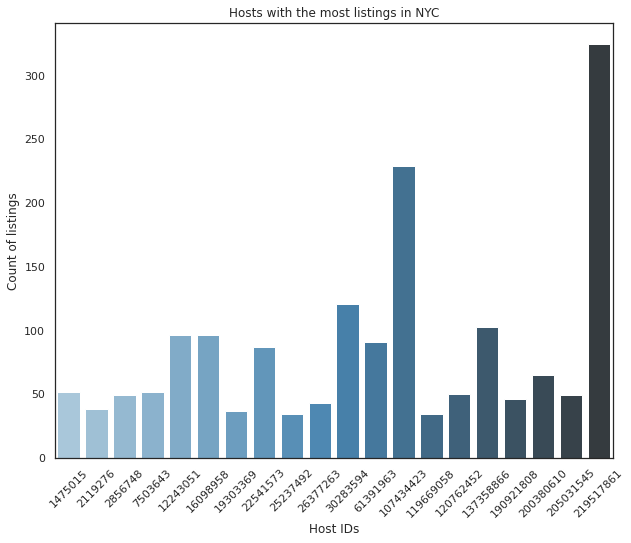

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##Borough Analysis

Borough count

In [ ]:
df_nyc_groupby = df_nyc.groupby(['borough'])['name'].count()
df_nyc_groupby.sort_values(ascending= False)

borough
Manhattan        21506
Brooklyn         19920
Queens            5637
Bronx             1084
Staten Island      372
Name: name, dtype: int64

Borough and price comparision

In [ ]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df_nyc.loc[df_nyc['borough'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df_nyc.loc[df_nyc['borough'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df_nyc.loc[df_nyc['borough'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df_nyc.loc[df_nyc['borough'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df_nyc.loc[df_nyc['borough'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [ ]:
#empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#change names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilize dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

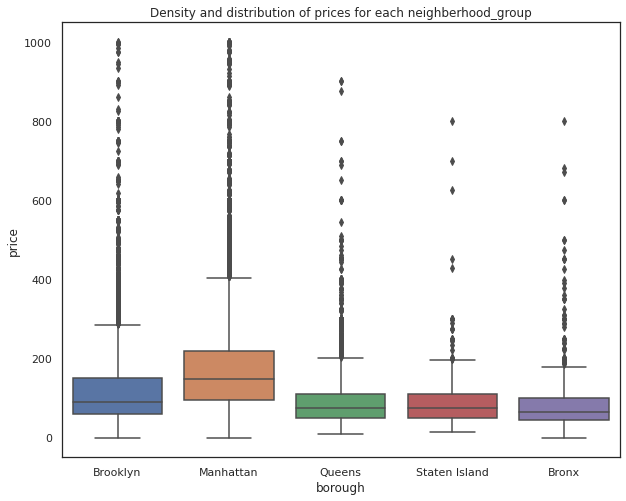

In [ ]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df_nyc[df_nyc.price < 1000]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.boxplot(data=sub_6, x='borough', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

**Remove the outlier having price greater than 500 and less than 50**

In [ ]:
df_nyc_clean = df_nyc[(df_nyc['price'] <= 500) & (df_nyc['price'] >= 50)]
df_nyc_clean.count()

name                              42486
host_id                           42486
borough                           42486
neighbourhood                     42486
latitude                          42486
longitude                         42486
room_type                         42486
price                             42486
minimum_nights                    42486
number_of_reviews                 42486
reviews_per_month                 42486
calculated_host_listings_count    42486
availability_365                  42486
price_euro                        42486
dtype: int64

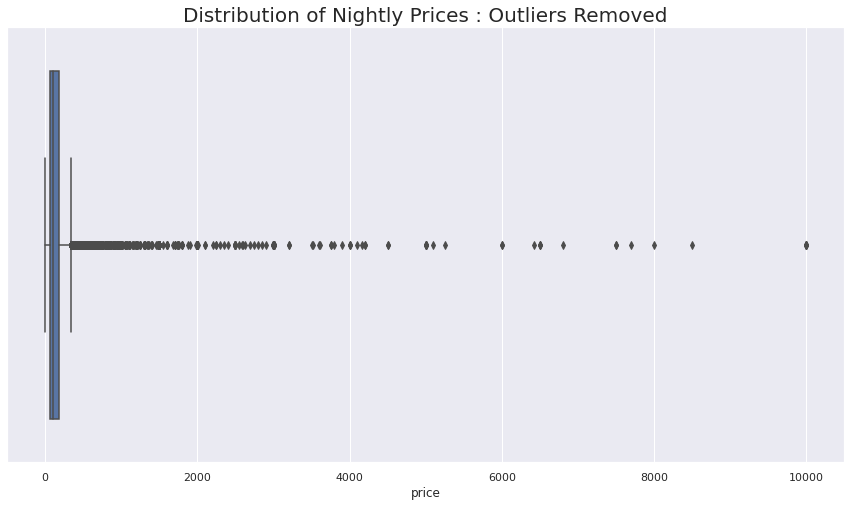

In [ ]:
sns.boxplot(x=df_nyc['price']).set_title('Distribution of Nightly Prices : Outliers Removed', fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

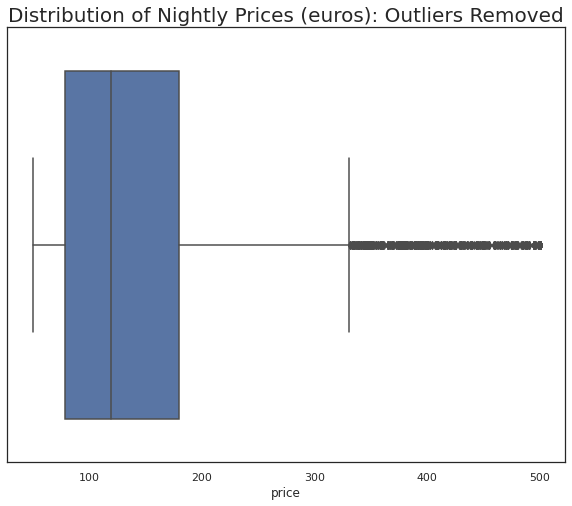

In [ ]:
sns.boxplot(x=df_nyc_clean['price']).set_title('Distribution of Nightly Prices (euros): Outliers Removed', fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

We can't remove outliers between 300-500 because one borough, Manhattan, is the source.
 

##How many owners are there? How many owners have multiple residences for rent? Which host has the most properties? How many?

In [ ]:
multi_units = df_nyc_clean.pivot_table(index = ['host_id'], aggfunc ='size').reset_index()
multi_units.rename(columns={0:'property_count'}, inplace=True)
multi_units.nunique()

host_id           33638
property_count       41
dtype: int64

In [ ]:
multi_units[multi_units.property_count > 1].count()

host_id           4200
property_count    4200
dtype: int64

In [ ]:
multi_units.sort_values(by= ['property_count'], ascending = False).head(20)

,host_id,property_count
31191,219517861,310
26641,107434423,229
17960,30283594,116
11835,12243051,96
13317,16098958,95
23361,61391963,91
15748,22541573,87
30504,200380610,62
2816,1475015,52
9041,7503643,52


##Neighbour Analysis

Top 20 neighbourhoods for rentals


In [ ]:
df_nyc_clean.neighbourhood.value_counts(20)

Williamsburg          0.086170
Bedford-Stuyvesant    0.070164
Harlem                0.056018
Hell's Kitchen        0.044156
Upper West Side       0.043191
                        ...   
Richmondtown          0.000024
Westerleigh           0.000024
New Dorp              0.000024
Rossville             0.000024
Willowbrook           0.000024
Name: neighbourhood, Length: 219, dtype: float64

Number of neghbourhoods in each borough

In [ ]:
df_nyc_clean.groupby(['borough'])['neighbourhood'].nunique().sort_values(ascending= False)

borough
Queens           51
Bronx            48
Brooklyn         47
Staten Island    41
Manhattan        32
Name: neighbourhood, dtype: int64

##Room Type analysis

How many residences are there by room type?

In [ ]:
df_nyc_clean.groupby(['room_type'])['name'].count()

room_type
Entire home/apt    24214
Private room       17743
Shared room          529
Name: name, dtype: int64

In [ ]:
df_nyc['room_type'].value_counts()

Entire home/apt    25220
Private room       22148
Shared room         1151
Name: room_type, dtype: int64

In [ ]:
df_nyc_clean.room_type.value_counts(normalize = True)*100

Entire home/apt    56.992892
Private room       41.761992
Shared room         1.245116
Name: room_type, dtype: float64

In [ ]:
df_nyc.room_type.value_counts(normalize = True)*100

Entire home/apt    51.979637
Private room       45.648097
Shared room         2.372267
Name: room_type, dtype: float64

Create two pivot tables to show
 1. the number of each room type by borough 
 2. the median price for each room type by borough.

In [ ]:
pd.pivot_table(df_nyc_clean, values = 'price_euro', index = 'borough', 
                                        columns = 'room_type',aggfunc = len)
#add percentage table

room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,363,381,21
Brooklyn,9235,7624,102
Manhattan,12417,7257,349
Queens,2033,2370,53
Staten Island,166,111,4


Brooklyn and Manhattan have approximately the same number of private rooms, but there is a significant difference in entire home/apt housing type. We need to investigate how to increase entire home/apts in Brooklyn.

**Count of each room type in each borough** 

##Neighbourhood and room type anlysis with borough

In [ ]:
#top 10 neighbourhoods
list(df_nyc_clean.neighbourhood.value_counts().head(10).index)

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 "Hell's Kitchen",
 'Upper West Side',
 'Bushwick',
 'East Village',
 'Upper East Side',
 'Midtown',
 'Crown Heights']

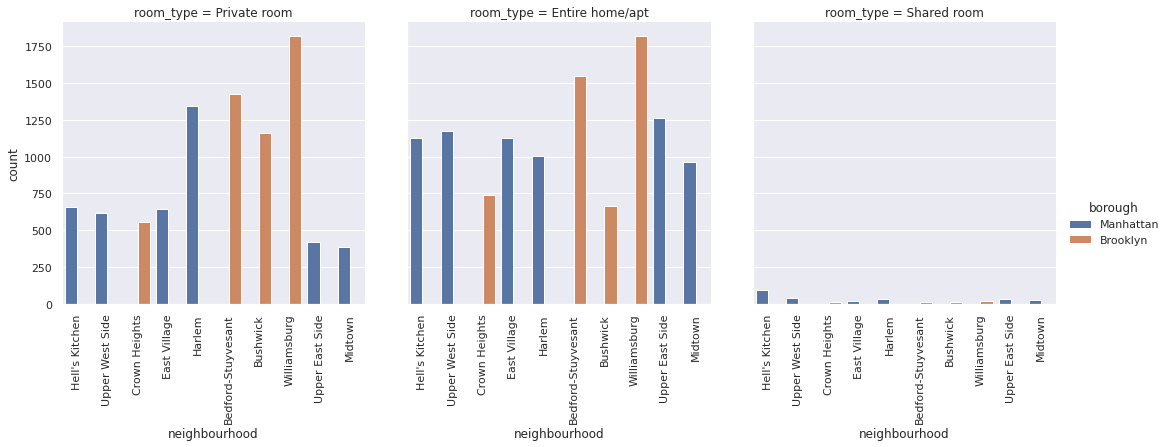

In [ ]:
Top_10_neighbourhood = list(df_nyc_clean.neighbourhood.value_counts().head(10).index)
sub_7=df_nyc_clean.loc[df_nyc_clean['neighbourhood'].isin(Top_10_neighbourhood)]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='borough', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In the above graph, we can observe that 
* 'Shared room' type of rarely 
available in top 10 listing-populated neighbourhood. 
* Only two borough 'Manhattan' and 'Brooklyn' are shown in the hue, which was expected since these two borough are most travelled places therefore all top 10 neighbourhood present in these two borough. 
* We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

Eliminate the room types other than Entire home/apt. How much did this reduce the number of available units?

In [ ]:
df_nyc_entire = df_nyc_clean[df_nyc_clean['room_type'] == 'Entire home/apt']

print('Total available units: ',len(df_nyc_clean))
print('\n') 
print('Available entire home/apt units: ',len(df_nyc_entire))

Total available units:  42486


Available entire home/apt units:  24214


##Latitude and logitude Analysis


No handles with labels found to put in legend.


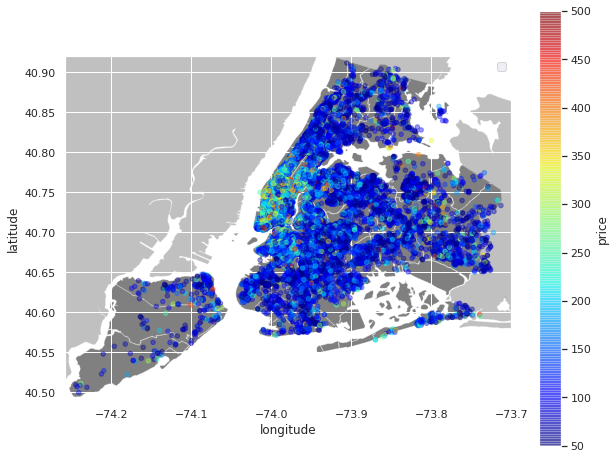

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df_nyc_clean.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

###Airport distance analysis


NYC has 3 major commercial airport
1. John F. Kennedy International Airport (JFK) (40.6413, -73.780968)
2. Newark Liberty International Airport (EWR) (40.735657, -74.172363)
3. LaGuardia Airport (LGA) (40.7747222222, -73.8719444444)


In [ ]:
#Calculate distance of properties from these 3 airports
airport_locations = [[40.6413, -73.780968], [40.735657, -74.172363], [40.7747222222, -73.8719444444]]

#location of listings
listings_location = df_nyc_clean[['latitude','longitude']]

#Distance vector column= airports rows = listings and value = distance in KM 
airport_distance_vector = haversine_vector(airport_locations , listings_location , Unit.KILOMETERS, comb=True)

#adding airport distance vector in to df_nyc_clean
df_nyc_clean[['JFK','EWR','LGA']] = airport_distance_vector 

df_nyc_clean[['name','price','JFK','EWR','LGA']].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,name,price,JFK,EWR,LGA
0,Clean & quiet apt home by the park,149.0,16.163463,19.504615,16.486446
3,Cozy Entire Floor of Brownstone,89.0,15.848939,18.779581,12.408768
5,Large Cozy 1 BR Apartment In Midtown East,200.0,20.186493,16.681016,9.186150
7,Large Furnished Room Near B'way,79.0,22.010685,16.119956,9.577391
10,Beautiful 1br on Upper West Side,135.0,23.783006,18.972653,8.483422


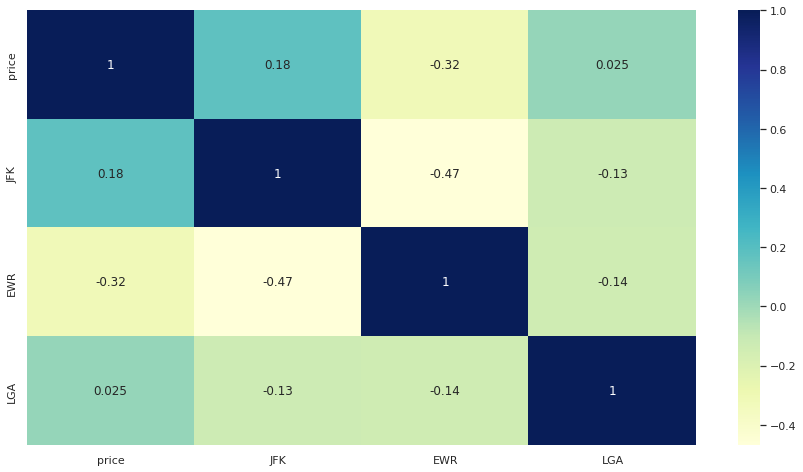

In [ ]:
dataplot = sns.heatmap(df_nyc_clean[['name','price','JFK','EWR','LGA']].corr(), cmap="YlGnBu", annot=True)

EWR and price has -0.32 correlation which can support that prices of property near EWR airport are tend to be expensive .`

##Commercial and Non commercial Analysis


It is given that commercial neighburhood of NYC are 

1. Downtown Brooklyn
2. Navy Yard 
3. DUMBO 
4. Financial District
5. Civic Center
6. Midtown


Create a column indicating the commercial vs. non-commercial neighourhoods


In [ ]:
df_nyc_clean['commercial'] = df_nyc_clean['neighbourhood'].isin(['Downtown Brooklyn','Navy Yard', 'DUMBO', 'Financial District', 'Civic Center', 'Midtown'])*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#count of property near commercial vs non-commercial place
df_nyc_clean['commercial'].value_counts()

0    40224
1     2262
Name: commercial, dtype: int64

In [ ]:
df_nyc_clean['commercial'].value_counts(normalize = True)*100

0    94.675893
1     5.324107
Name: commercial, dtype: float64

In [ ]:
print('Total no. of residence in clean dataset of NYC: ', len(df_nyc_clean))
print('\n')
print('No. of residence in commercial neighbourhood: ', df_nyc_clean['commercial'].value_counts()[1] )
print('No. of residence in Non-commercial neighbourhood: ', df_nyc_clean['commercial'].value_counts()[0] )
print('\n')
print('Percentage of residence in commercial neighbourhood:', (df_nyc_clean['commercial'].value_counts(normalize = True)*100)[1] )
print('Percentage of residence in Non-commercial neighbourhood:', (df_nyc_clean['commercial'].value_counts(normalize = True)*100)[0] )


Total no. of residence in clean dataset of NYC:  42486


No. of residence in commercial neighbourhood:  2262
No. of residence in Non-commercial neighbourhood:  40224


Percentage of residence in commercial neighbourhood: 5.324106764581274
Percentage of residence in Non-commercial neighbourhood: 94.67589323541873


Most of properties are availble in Non commercial places

**Are prices inside the non commercial neighborhoods in Manhattan and Brooklyn significantly cheaper than other neighborhoods in their respective boroughs?**

In [ ]:
#commercial neighborhoods
df_nyc_clean[df_nyc_clean['commercial']==1].groupby(['borough']).agg({'price_euro':['mean','median','min', 'max']})

price_euro                     
                 mean  median   min    max
borough                                   
Brooklyn   142.109767  132.00  44.0  352.0
Manhattan  188.548561  175.12  44.0  440.0

Bronx, Queens and Staten island do not have commercial neighbour therfore we didn't get those in above table

In [ ]:
#non-commerical neighborhoods
df_nyc_clean[df_nyc_clean['commercial']==0].groupby(['borough']).agg({'price_euro':['mean','median','min', 'max']})

price_euro                    
                     mean median   min    max
borough                                      
Bronx           87.843556   70.4  44.0  440.0
Brooklyn       109.212852   88.0  44.0  440.0
Manhattan      142.664282  123.2  44.0  440.0
Queens          93.772531   74.8  44.0  440.0
Staten Island   94.695516   74.8  44.0  396.0

From the above table we can observe that mean and median of commercial vs Non-commercial places of Manhattan and Brooklyn have significantly diffrence.
Non commercial place are significantly cheaper.

##Review analysis

In [ ]:
#last column we need to look at is 'number_of_reviews'

#let's grab 100 most reviewed listings in NYC
top_reviewed_listings=df_nyc_clean.nlargest(100,'number_of_reviews')
top_reviewed_listings[['name','number_of_reviews','price']]

,name,number_of_reviews,price
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,540.0,99.0
4870,Private brownstone studio Brooklyn,488.0,160.0
471,LG Private Room/Family Friendly,480.0,60.0
1271,My Little Guest Room in Flushing,474.0,55.0
113,Park Slope Green Guest House,467.0,120.0
...,...,...,...
3605,"Brooklyn Charm, Close to Manhattan (30+ Days O...",314.0,112.0
2006,"Private Suite, Free Metrocard*",313.0,81.0
25249,Private Guest Suite Less than 10 min to JFK :),310.0,50.0
162,"Private, Large & Sunny 1BR w/W&D",309.0,135.0


In [ ]:
review_price_100 = top_reviewed_listings[['number_of_reviews','price']]
review_price_100.corr()

,number_of_reviews,price
number_of_reviews,1.000000,-0.206171
price,-0.206171,1.000000


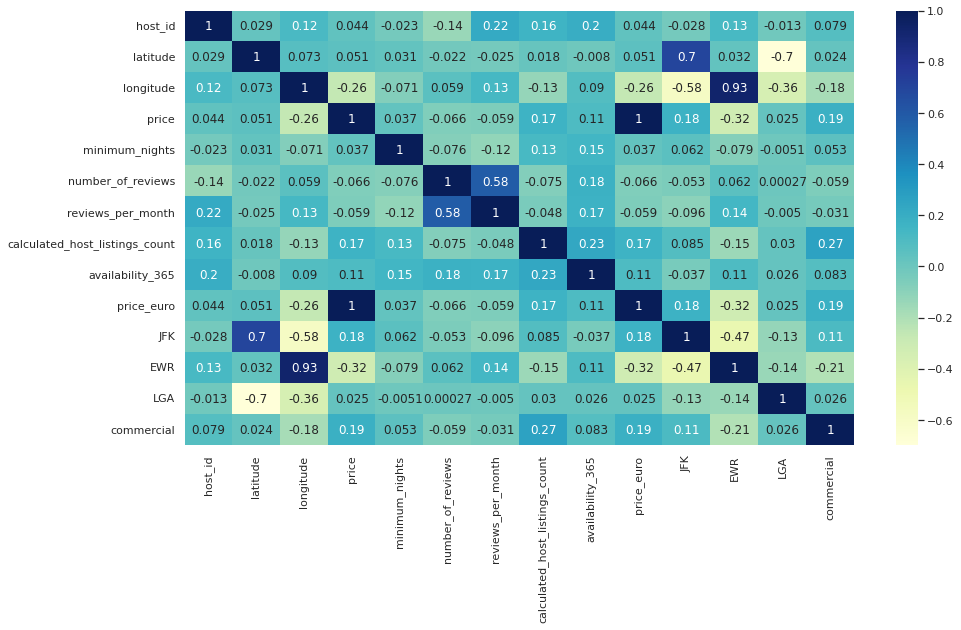

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df_nyc_clean.corr(), cmap="YlGnBu", annot=True)



##Availability analysis

In [ ]:
#value count of availability 365
df_nyc_clean['availability_365'].value_counts()

0.0      15292
365.0     1049
364.0      438
1.0        354
89.0       307
         ...  
186.0       23
183.0       22
181.0       22
196.0       21
202.0       18
Name: availability_365, Length: 366, dtype: int64

In [ ]:
df_nyc_clean['availability_365'].value_counts(normalize = True)*100

0.0      35.993033
365.0     2.469049
364.0     1.030928
1.0       0.833216
89.0      0.722591
           ...    
186.0     0.054135
183.0     0.051782
181.0     0.051782
196.0     0.049428
202.0     0.042367
Name: availability_365, Length: 366, dtype: float64

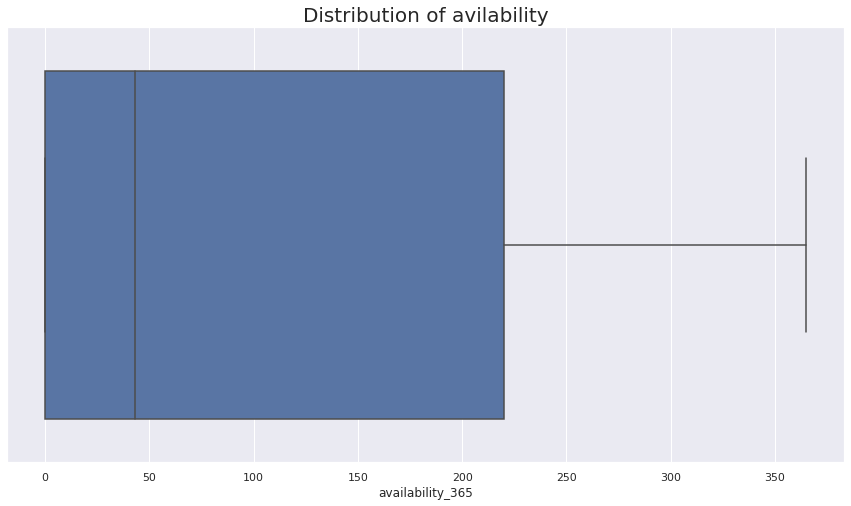

In [ ]:
sns.boxplot(x=df_nyc_clean['availability_365']).set_title('Distribution of avilability', fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

##Availability borough wise

##Just for Experiment

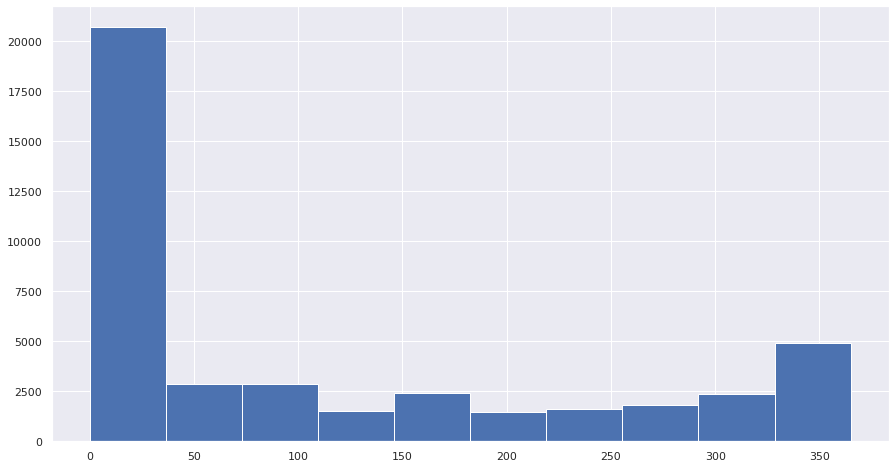

In [ ]:
df_nyc_clean.availability_365.hist()

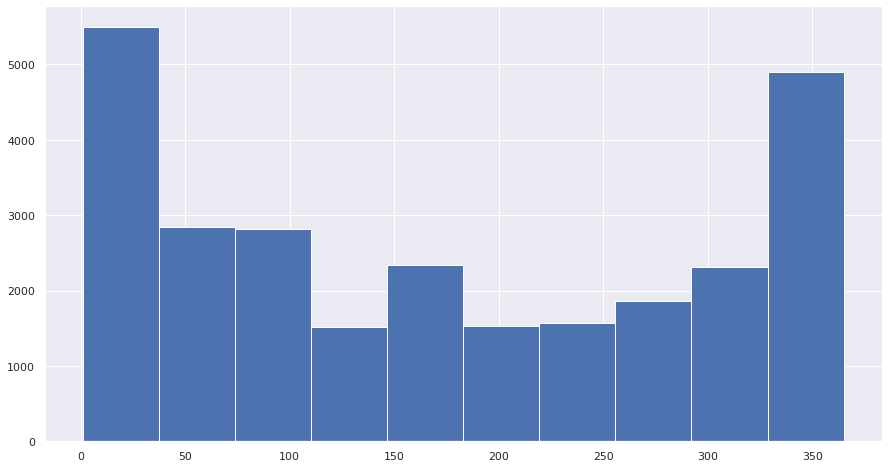

In [ ]:
df_nyc_clean[df_nyc_clean['availability_365']>0].availability_365.hist()


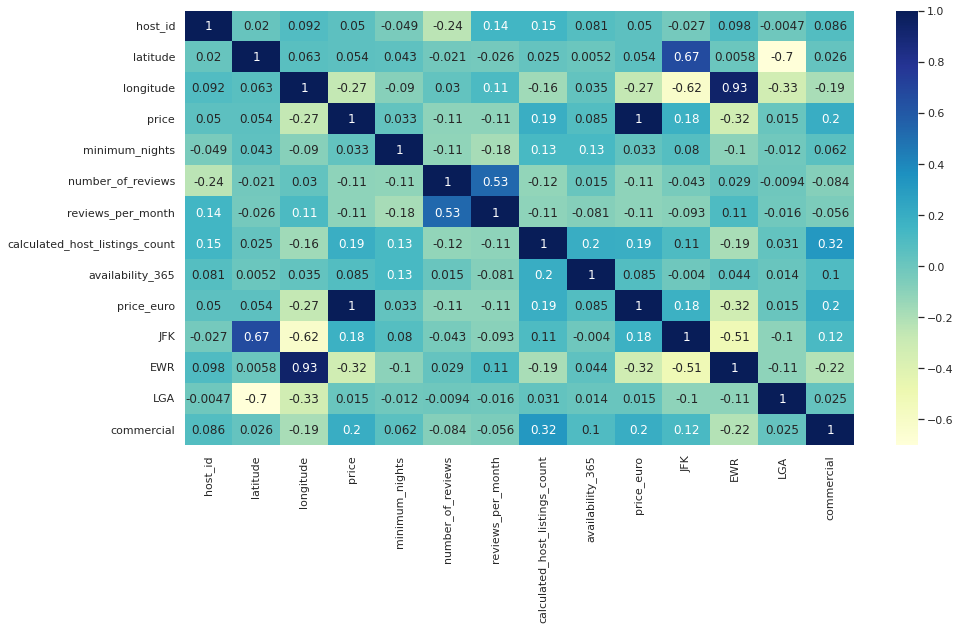

In [ ]:
dataplot = sns.heatmap(df_nyc_clean[df_nyc_clean['availability_365']>0].corr(), cmap="YlGnBu", annot=True)

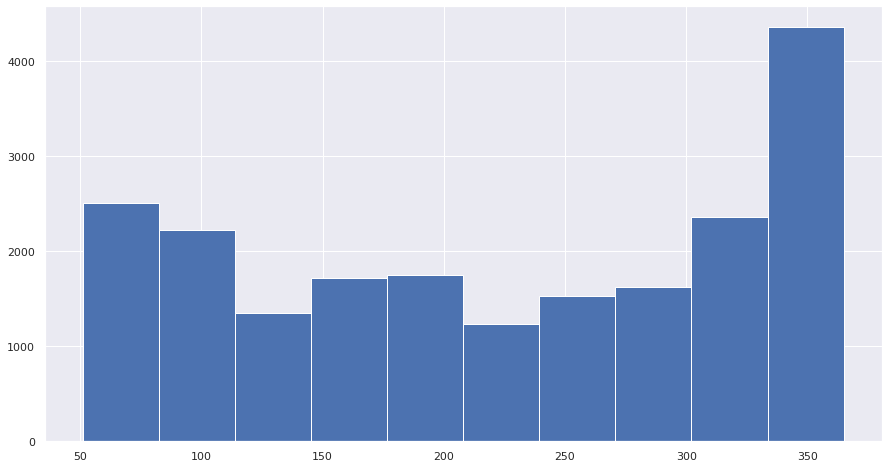

In [ ]:
df_nyc_clean[df_nyc_clean['availability_365']>50]['availability_365'].hist()

#Minimum nights

In [ ]:
df_nyc_clean['minimum_nights'].value_counts()

1.0      10777
2.0      10457
3.0       7192
30.0      3125
4.0       2960
         ...  
160.0        1
186.0        1
366.0        1
68.0         1
33.0         1
Name: minimum_nights, Length: 103, dtype: int64

In [ ]:
df_nyc['minimum_nights'].value_counts()

1.0      12633
2.0      11611
3.0       7938
30.0      3731
4.0       3278
         ...  
366.0        1
68.0         1
87.0         1
183.0        1
36.0         1
Name: minimum_nights, Length: 108, dtype: int64

#Average cashflow  per property from each borough

In [ ]:
total_price_borough =df_nyc_clean[['borough','price']].groupby('borough').agg('sum')

In [ ]:
total_price_borough.sort_values('price', ascending = False, inplace =True)

In [ ]:
total_price_borough

,price
borough,
Manhattan,3357316.0
Brooklyn,2109776.0
Queens,474830.0
Bronx,76364.0
Staten Island,30238.0


In [ ]:
no_of_property_borough = df_nyc_clean.borough.value_counts()

In [ ]:
no_of_property_borough

Manhattan        20023
Brooklyn         16961
Queens            4456
Bronx              765
Staten Island      281
Name: borough, dtype: int64

In [ ]:
df_cashflow = pd.DataFrame(no_of_property_borough)

In [ ]:
df_cashflow['price'] = total_price_borough

In [ ]:
df_cashflow['cashflow'] = df_cashflow['price']/df_cashflow['borough']

In [ ]:
df_cashflow

,borough,price,cashflow
Manhattan,20023,3357316.0,167.672976
Brooklyn,16961,2109776.0,124.389836
Queens,4456,474830.0,106.559695
Bronx,765,76364.0,99.822222
Staten Island,281,30238.0,107.608541


In [ ]:
df_cashflow['cashflow']/df_cashflow['cashflow'].sum()*100

Manhattan        27.666376
Brooklyn         20.524571
Queens           17.582562
Bronx            16.470866
Staten Island    17.755624
Name: cashflow, dtype: float64

# Conclusion



*   The properties of entire home and  private rooms are prefereed by airbnb hosts offering rental in NYC.
*   The room types 'Entire home/ apt' and 'Private room' account for a major portion of listed prperties in NYC (around 97%)
* Shared rooms account for 2.4% of the total listed properties
* The rental properties in Manahattan and Brooklyn are more expensive than any other areas. while Bronx are least expensive.
* Manhattan has 51% and Brooklyn has 31% contribution in Entire home/apt type residence and rest others contribution involved.
* Manhattan and Brooklyn have similar contribuion(~40%) in Private room type.
* Distance from Newark Liberty International Airport (EWR) and Price has negative corelation(-0.34), which shows property near EWR are more expensive. We did not find any signifiant correlation between other 2 airport.
* Number of reviews and price are negatively correlated(-0.14). properties with lower price have more reviews.
* Average cash flow per day per property from each borough are similar except Manhattan which contribute 27%  



